- https://www.geeksforgeeks.org/how-to-automate-data-cleaning-in-python/
- https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd
- https://www.geeksforgeeks.org/handling-missing-data-with-knn-imputer/

In [1115]:
#importing needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

In [1116]:
#creating a dataframe
df = pd.read_csv('Trendyol_Sales_Data_Dirty.csv')

In [1117]:
# number of (rows, columns)
df.shape

(1100, 14)

In [1118]:
#first look of the data
df.head()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
0,2020.0,4.0,@Bursa,NaN,Cr3dit C@rd,D3sktop,@Yes,@New,477.75,10.0,32.34 TRY,6.0,4.7,113.97
1,2023.0,11.0,@NA,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56 TRY,2.0,4.6,103.36
2,2011.0,5.0,Samsun,@NA,E-W@ll3t,Desktop,No,@Returning,264.94,3.0,24.97 TRY,3.0,3.4,22.84
3,2017.0,2.0,diyarbakir,clothing,@E-Wallet,Mobil3,YES,@NA,353.31,8.0,36.25 TRY,4.0,3.6,59.85
4,2013.0,6.0,BURSA,NaN,CREDIT CARD,Desktop,YES,@Returning,NaN,6.0,43.16 TRY,4.0,4.2,7.82


In [1119]:
df.tail()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
1095,2019.0,6.0,diyarbakir,@Beauty,DEBIT CARD,Desktop,NA,@Returning,369.58,NaN,18.53 TRY,1.0,4.1,96.98
1096,2017.0,12.0,Ad@n@,Clothing,E-W@ll3t,Tablet,@Yes,returning,308.40,9.0,26.38 TRY,2.0,4.3,35.76
1097,2019.0,8.0,konya,@Home,credit card,@Desktop,Y3s,RETURNING,446.99,7.0,58.41 TRY,7.0,3.1,94.61
1098,2013.0,4.0,ANKARA,Clothing,@Debit Card,DESKTOP,@Yes,@New,454.18,3.0,63.72 TRY,4.0,3.8,51.76
1099,2016.0,3.0,Kony@,clothing,na,tablet,@No,@New,202.42,NaN,14.81 TRY,6.0,NaN,48.62


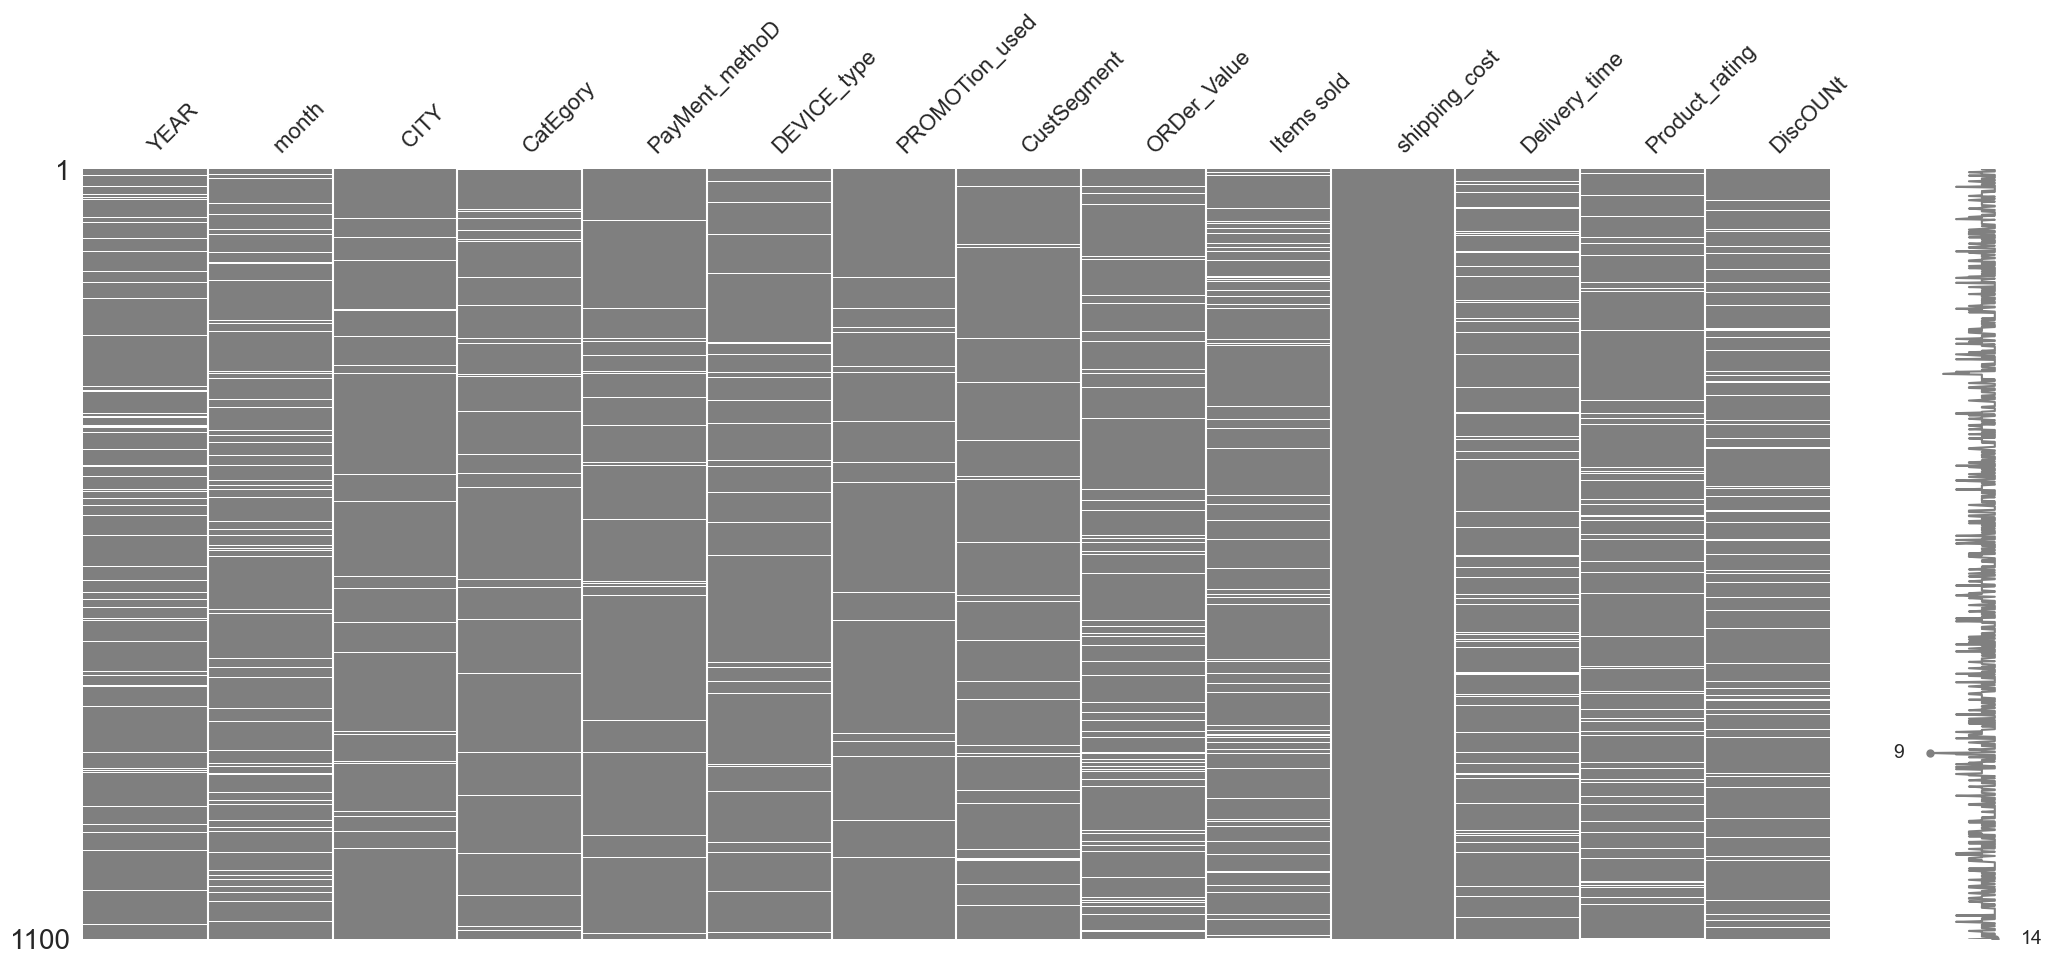

In [1120]:
#visualization of Na's
msno.matrix(df, color = (0.5, 0.5, 0.5));

In [1121]:
df.describe()

,YEAR,month,ORDer_Value,Items sold,Delivery_time,Product_rating,DiscOUNt
count,1024.000000,1013.000000,1015.000000,1000.000000,1011.000000,1014.000000,1015.000000
mean,2016.387695,6.593287,284.198039,5.598000,4.057369,3.986588,44.229665
std,4.052091,3.443565,128.439806,2.764786,1.971247,0.567321,33.676211
min,2010.000000,1.000000,50.530000,1.000000,1.000000,3.000000,0.180000
25%,2013.000000,4.000000,174.585000,3.000000,2.000000,3.500000,16.865000
50%,2016.000000,7.000000,287.700000,6.000000,4.000000,4.000000,35.670000
75%,2020.000000,10.000000,394.640000,8.000000,6.000000,4.500000,66.430000
max,2023.000000,12.000000,499.760000,10.000000,7.000000,5.000000,145.120000


In [1122]:
#names of the columns are not clear
df.columns

Index(['YEAR', 'month ', ' CITY', 'CatEgory', 'PayMent_methoD', 'DEVICE_type',
       'PROMOTion_used', 'CustSegment', 'ORDer_Value', 'Items sold',
       'shipping_cost', 'Delivery_time', 'Product_rating', 'DiscOUNt'],
      dtype='object')

In [1123]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['year', 'month', 'city', 'category', 'payment_method', 'device_type',
       'promotion_used', 'custsegment', 'order_value', 'items_sold',
       'shipping_cost', 'delivery_time', 'product_rating', 'discount'],
      dtype='object')

In [1124]:
# fixing objevt values
df['city'] = df['city'].str.replace('@', '').str.title()

df['category'] = df['category'].replace({'@NA': np.nan})

df['payment_method'] = df['payment_method'].replace({
    'Cr3dit C@rd': 'Credit Card',
    'E-W@ll3t': 'E-Wallet',
    '@E-Wallet': 'E-Wallet',
    'CREDIT CARD': 'Credit Card'
})

df['device_type'] = df['device_type'].replace({
    'D3sktop': 'Desktop',
    'Mobil3': 'Mobile'
})

df['promotion_used'] = df['promotion_used'].str.replace('@', '').str.title()

df['custsegment'] = df['custsegment'].str.replace('@', '')


In [1125]:
# converted NaN all null values.
nonValue = ["@na","NaN","@NA","na","NA","none","None","empty","NONE",None,""]
df = df.replace(nonValue ,np.nan) 

In [1126]:
#how many Na values ​​are there?
print(df['year'].isna().sum())

76


In [1127]:
#selecting  only numeric columns
numeric_columns = df.select_dtypes(include=['number']);

In [1128]:
df[numeric_columns.columns].isna().sum()

year               76
month              87
order_value        85
items_sold        100
delivery_time      89
product_rating     86
discount           85
dtype: int64

In [1129]:
df['shipping_cost'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1100 entries, 0 to 1099
Series name: shipping_cost
Non-Null Count  Dtype 
--------------  ----- 
1100 non-null   object
dtypes: object(1)
memory usage: 8.7+ KB


In [1130]:
# Sütundaki NaN olmayan değerlerle işlem yap
df['shipping_cost'] = df['shipping_cost'].apply(lambda x: x.replace(' TRY', '') if pd.notna(x) else x)

# NaN olmayanları sayıya çevir
df['shipping_cost'] = pd.to_numeric(df['shipping_cost'], errors='coerce')


In [1131]:
df['shipping_cost'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1100 entries, 0 to 1099
Series name: shipping_cost
Non-Null Count  Dtype  
--------------  -----  
1018 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


In [1132]:
df.describe()

,year,month,order_value,items_sold,shipping_cost,delivery_time,product_rating,discount
count,1024.000000,1013.000000,1015.000000,1000.000000,1018.000000,1011.000000,1014.000000,1015.000000
mean,2016.387695,6.593287,284.198039,5.598000,28.647544,4.057369,3.986588,44.229665
std,4.052091,3.443565,128.439806,2.764786,15.220923,1.971247,0.567321,33.676211
min,2010.000000,1.000000,50.530000,1.000000,3.820000,1.000000,3.000000,0.180000
25%,2013.000000,4.000000,174.585000,3.000000,16.310000,2.000000,3.500000,16.865000
50%,2016.000000,7.000000,287.700000,6.000000,27.170000,4.000000,4.000000,35.670000
75%,2020.000000,10.000000,394.640000,8.000000,38.610000,6.000000,4.500000,66.430000
max,2023.000000,12.000000,499.760000,10.000000,74.640000,7.000000,5.000000,145.120000


In [1133]:
df[numeric_columns.columns].isna().sum()

year               76
month              87
order_value        85
items_sold        100
delivery_time      89
product_rating     86
discount           85
dtype: int64

In [1134]:
# Sadece sayısal sütunları seçin
numeric_columns = df.select_dtypes(include=['number'])

# KNN Imputer uygulama
imputed_data = imputer.fit_transform(numeric_columns)

# Eksik doldurulan veriyi geri DataFrame'e dönüştürme
df[numeric_columns.columns] = imputed_data

In [1135]:
df.isna().sum()

year               0
month              0
city              33
category          76
payment_method    59
device_type       74
promotion_used    30
custsegment       77
order_value        0
items_sold         0
shipping_cost      0
delivery_time      0
product_rating     0
discount           0
dtype: int64

In [1136]:
data.nunique()

YEAR               14
month              12
 CITY              83
CatEgory           33
PayMent_methoD     23
DEVICE_type        18
PROMOTion_used     13
CustSegment        13
ORDer_Value       919
Items sold         10
shipping_cost     842
Delivery_time       7
Product_rating     21
DiscOUNt          886
dtype: int64

In [1137]:
df['year'].unique()

array([2020. , 2023. , 2011. , 2017. , 2013. , 2022. , 2011.5, 2019. ,
       2015. , 2014. , 2016. , 2018. , 2021.5, 2012. , 2021. , 2010. ,
       2017.5, 2016.5, 2014.5, 2015.5, 2022.5, 2018.5, 2019.5, 2020.5])

In [1138]:
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

In [1139]:
df.head()

,year,month,city,category,payment_method,device_type,promotion_used,custsegment,order_value,items_sold,shipping_cost,delivery_time,product_rating,discount
0,2020,4,Bursa,NaN,Credit Card,Desktop,Yes,New,477.75,10.0,32.34,6.0,4.7,113.97
1,2023,11,Na,Toys,Debit Card,Desktop,No,Returning,369.63,4.0,34.56,2.0,4.6,103.36
2,2011,5,Samsun,NaN,E-Wallet,Desktop,No,Returning,264.94,3.0,24.97,3.0,3.4,22.84
3,2017,2,Diyarbakir,clothing,E-Wallet,Mobile,Yes,NaN,353.31,8.0,36.25,4.0,3.6,59.85
4,2013,6,Bursa,NaN,Credit Card,Desktop,Yes,Returning,476.56,6.0,43.16,4.0,4.2,7.82


In [1140]:
#month

In [1141]:
print(df['month'].isna().sum())

0


In [1142]:
df['month'].unique()

array([ 4, 11,  5,  2,  6,  8,  7, 10,  3, 12,  1,  9])

In [1143]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1)) # combine month and year and assign day 1

In [1144]:
df.drop(['year', 'month'], axis=1, inplace=True)
#dropped year and month

In [1145]:
df.head()

,city,category,payment_method,device_type,promotion_used,custsegment,order_value,items_sold,shipping_cost,delivery_time,product_rating,discount,date
0,Bursa,NaN,Credit Card,Desktop,Yes,New,477.75,10.0,32.34,6.0,4.7,113.97,2020-04-01
1,Na,Toys,Debit Card,Desktop,No,Returning,369.63,4.0,34.56,2.0,4.6,103.36,2023-11-01
2,Samsun,NaN,E-Wallet,Desktop,No,Returning,264.94,3.0,24.97,3.0,3.4,22.84,2011-05-01
3,Diyarbakir,clothing,E-Wallet,Mobile,Yes,NaN,353.31,8.0,36.25,4.0,3.6,59.85,2017-02-01
4,Bursa,NaN,Credit Card,Desktop,Yes,Returning,476.56,6.0,43.16,4.0,4.2,7.82,2013-06-01


In [1146]:
#order_value, shipping_cost, delivery_time, product_rating, discount float olarak kalabilir.

In [1147]:
df['items_sold'].unique()

array([10. ,  4. ,  3. ,  8. ,  6. ,  5. ,  9. ,  7. ,  1. ,  2. ,  7.5,
        4.5,  5.5,  2.5,  8.5,  6.5,  3.5])

In [1148]:
#items_sold değerleri integera çevirirlmeli.
df['items_sold'] = df['items_sold'].astype(int)

In [1149]:
df['items_sold'].unique()

array([10,  4,  3,  8,  6,  5,  9,  7,  1,  2])

In [1150]:
#items_sold değerleri integera çevirirlmeli.
df['delivery_time'] = df['delivery_time'].astype(int)

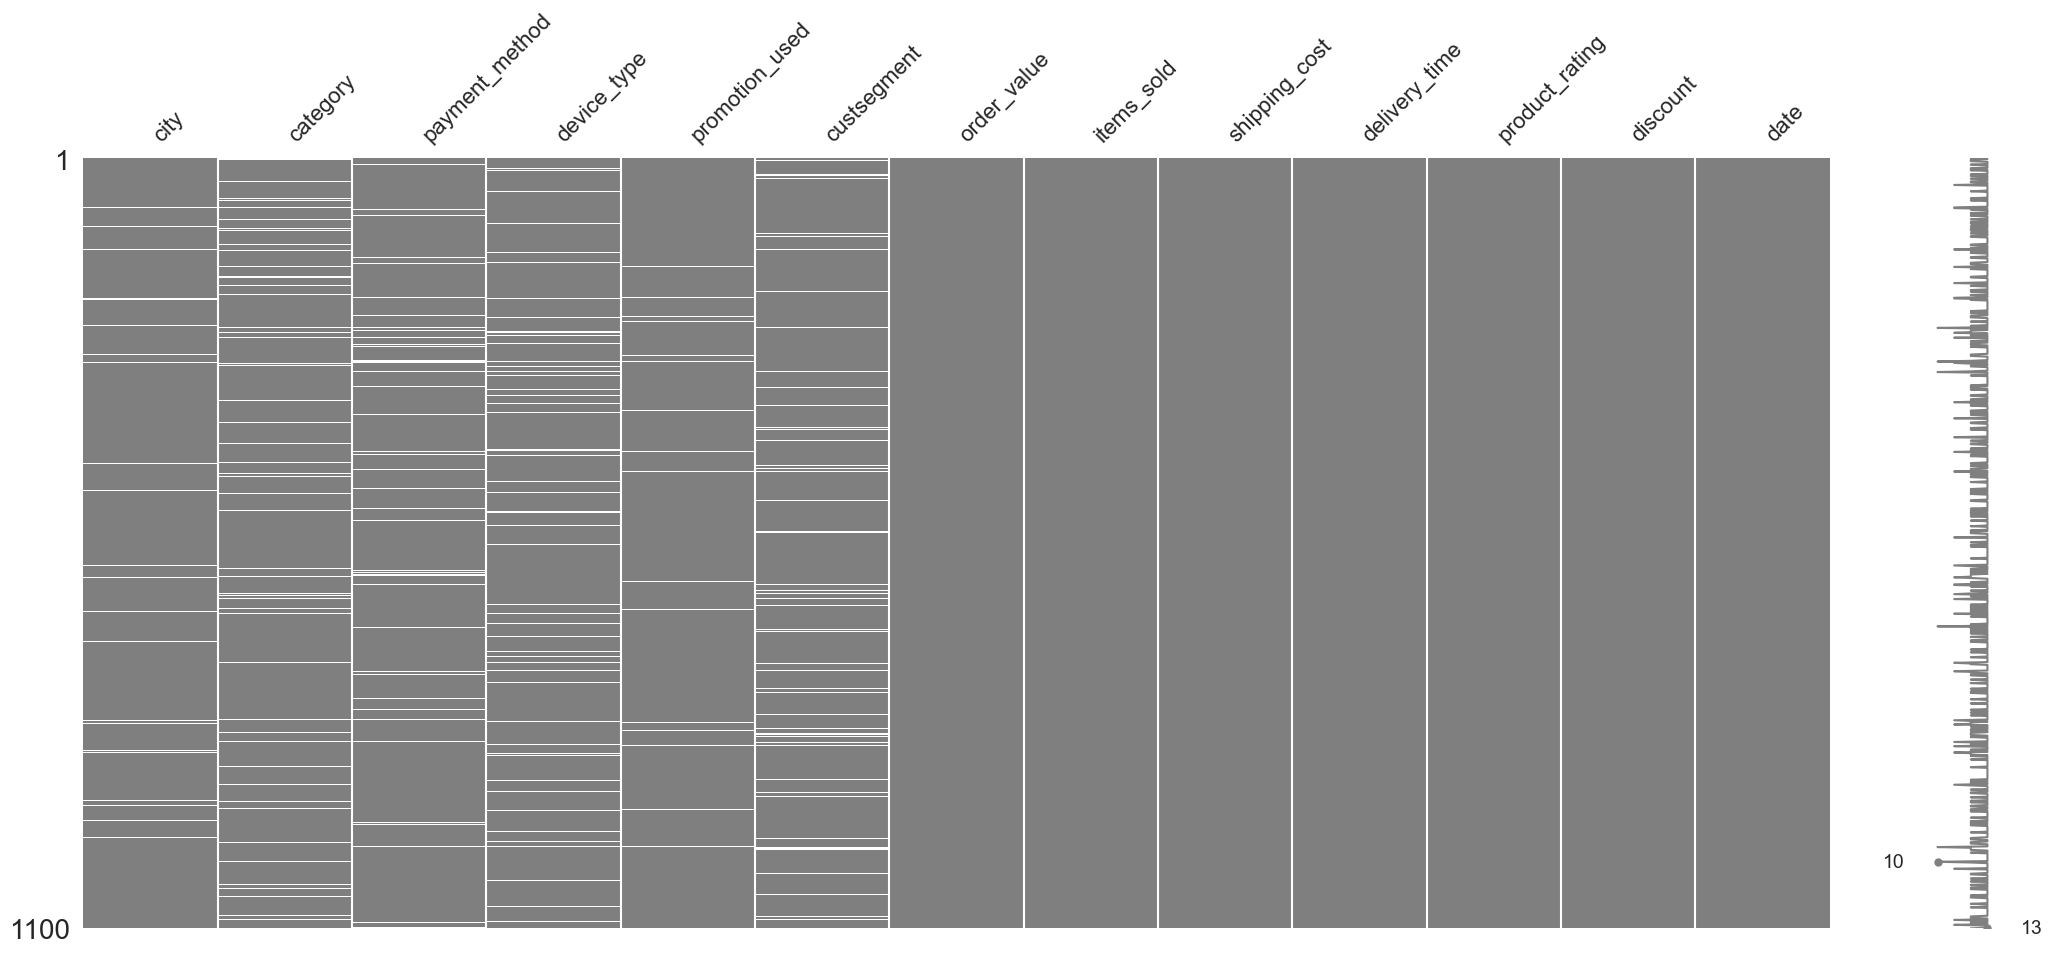

In [1151]:
msno.matrix(df, color = (0.5, 0.5, 0.5));

In [1152]:
df['city'].isna().sum()

33

In [1153]:
df["city"].unique()

array(['Bursa', 'Na', 'Samsun ', 'Diyarbakir', 'Smsun', 'Na ', 'Istanbul',
       'Trbzon', 'Malatya ', 'Gaziantep', 'Diyarbakir ', 'Van ', nan,
       'Kayseri', 'Trabzon', 'Kayseri ', 'Konya', 'Van', 'Eskişehir',
       'Ankara', 'Samsun', 'Izmir', 'Istanbul ', 'Eskiş3Hir', 'Adana',
       'Burs', 'Mlty', 'Vn', 'Malatya', 'Kys3Ri', 'Izmir ', 'Antalya ',
       'Eskişehir ', 'Ankara ', 'Ankr', 'Mersin ', 'Gaziantep ', 'Adn',
       'Antalya', 'M3Rsin', 'Diyrbkir', 'Mersin', 'Istnbul', 'Trabzon ',
       'Gzint3P', 'Adana ', 'Antly', 'Konya ', 'Kony', 'Bursa '],
      dtype=object)

In [1154]:
df['city'] = df['city'].str.strip().str.replace("@","").str.title()

In [1155]:
df["city"]= df["city"].replace("Na",np.nan)

In [1156]:
df["city"] = df["city"].replace({
                                     "Diyarbakir":"Diyarbakır",
                                     "Smsun":"Samsun",
                                     "Istanbul":"İstanbul",
                                     "Trbzon":"Trabzon",
                                     "Izmir":"İzmir",
                                     "Eskiş3Hir":"Eskişehir",
                                     "Burs":"Bursa",
                                     "Mlty":"Malatya",
                                     "Vn":"Van",
                                     "Kys3Ri":"Kayseri",
                                     "Ankr":"Ankara",
                                     "Adn":"Adana",
                                     "M3Rsin":"Mersin",
                                     "Diyrbkir":"Diyarbakır",
                                     "Istnbul":"İstanbul",
                                     "Gzint3P":"Gaziantep",
                                     "Antly":"Antalya",
                                    "Kony":"Konya"})

In [1157]:
# we have missing values and we filled with mode
modeCity = df["city"].mode()[0]
modeCity #Ankara
df["city"] = df["city"].fillna(modeCity)

In [1158]:
df["city"].unique()

array(['Bursa', 'Ankara', 'Samsun', 'Diyarbakır', 'İstanbul', 'Trabzon',
       'Malatya', 'Gaziantep', 'Van', 'Kayseri', 'Konya', 'Eskişehir',
       'İzmir', 'Adana', 'Antalya', 'Mersin'], dtype=object)

In [1159]:
df["category"].unique()

array([nan, 'Toys ', 'clothing', 'NA ', '@Clothing', 'Clothing', 'Hom3',
       'beauty', 'Beauty ', 'TOYS', 'Home ', 'El3ctronics', 'HOME',
       'BOOKS', 'B3@uty', '@Toys', 'BEAUTY', 'home', 'ELECTRONICS',
       'electronics', 'Electronics ', '@Electronics', 'Toys', 'books',
       'Books', 'Clothing ', '@Beauty', '@Home', 'Books ', '@Books',
       'CLOTHING', 'toys'], dtype=object)

In [1160]:
df['category'] = df['category'].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["category"] = df["category"].replace("Na",np.nan)

In [1161]:
df["category"] = df["category"].replace("Beuty","Beauty")

In [1162]:
modeCategory= df["category"].mode()[0]
modeCategory #clothing
df["category"] = df["category"].fillna(modeCategory)

In [1163]:
df["category"].unique()

array(['Clothing', 'Toys', 'Home', 'Beauty', 'Electronics', 'Books'],
      dtype=object)

In [1164]:
df["category"].isnull().sum() 

0

In [1165]:
df['payment_method'] = df['payment_method'].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["payment_method"] = df["payment_method"].replace("Na",np.nan)

In [1166]:
df['payment_method'] = df['payment_method'].replace({"Credit Crd":"Credit Card",
                                                     "E-Wllet":"E-Wallet",
                                                     "Csh On Delivery":"Cash On Delivery",
                                                     "Debit Crd":"Debit Card",
                                                     })

In [1167]:
mode_payment_method= df["payment_method"].mode()[0]
mode_payment_method #credit card
df["payment_method"] = df["payment_method"].fillna(modeCategory)

In [1168]:
df['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'E-Wallet', 'Clothing',
       'Cash On Delivery'], dtype=object)

In [1169]:
df["payment_method"].isnull().sum() # 0

0

In [1170]:
df["device_type"].unique()

array(['Desktop', 'Desktop ', 'Mobile', 'desktop', 'Tablet ', 'TABLET',
       'tablet', 'Mobile ', nan, 'T@bl3t', 'mobile', 'NA ', 'DESKTOP',
       '@Mobile', '@Desktop', '@Tablet', 'MOBILE'], dtype=object)

In [1171]:
df["device_type"] = df["device_type"].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["device_type"] = df["device_type"].replace("Na",np.nan)
df["device_type"].unique()

array(['Desktop', 'Mobile', 'Tablet', nan, 'Tblet'], dtype=object)

In [1172]:
df["device_type"] = df["device_type"].replace("Tblet","Tablet")

In [1173]:
df["device_type"].isnull().sum()

95

In [1174]:
#we have 95 null values and we imputated with mode
modeDevice = df["device_type"].mode()[0]
modeDevice #Desktop
df["device_type"]=df["device_type"].fillna(modeDevice)

In [1175]:
df["device_type"].isnull().sum() # 0

0

In [1176]:
df["promotion_used"].unique()

array(['Yes', 'No ', 'No', 'Yes ', 'Na ', 'Y3S', 'Na', nan], dtype=object)

In [1177]:
df["promotion_used"] = df["promotion_used"].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["promotion_used"] = df["promotion_used"].replace("Na",np.nan)

In [1178]:
df["promotion_used"].unique()

array(['Yes', 'No', nan], dtype=object)

In [1179]:
df["promotion_used"].isnull().sum()

83

In [1180]:
#we have 83 null values we imputated with mode
modePromotion = df["promotion_used"].mode()[0]
modePromotion #Yes
df["promotion_used"] = df["promotion_used"].fillna(modePromotion)


In [1181]:
df["promotion_used"].isnull().sum() # 0

0

In [1182]:
df.head()

,city,category,payment_method,device_type,promotion_used,custsegment,order_value,items_sold,shipping_cost,delivery_time,product_rating,discount,date
0,Bursa,Clothing,Credit Card,Desktop,Yes,New,477.75,10,32.34,6,4.7,113.97,2020-04-01
1,Ankara,Toys,Debit Card,Desktop,No,Returning,369.63,4,34.56,2,4.6,103.36,2023-11-01
2,Samsun,Clothing,E-Wallet,Desktop,No,Returning,264.94,3,24.97,3,3.4,22.84,2011-05-01
3,Diyarbakır,Clothing,E-Wallet,Mobile,Yes,NaN,353.31,8,36.25,4,3.6,59.85,2017-02-01
4,Bursa,Clothing,Credit Card,Desktop,Yes,Returning,476.56,6,43.16,4,4.2,7.82,2013-06-01


In [1183]:
df["custsegment"].unique()

array(['New', 'Returning', nan, 'RETURNING', 'R3turning', 'New ', 'new',
       'Returning ', 'NEW', 'returning', 'N3w', 'NA '], dtype=object)

In [1184]:
df["custsegment"] = df["custsegment"].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["custsegment"] = df["custsegment"].replace("Na",np.nan)

In [1185]:
df["custsegment"].isnull().sum()

84

In [1186]:
# we have 84 null values we imputeted with mode
modeCustomerSegment = df["custsegment"].mode()[0]
modeCustomerSegment #new
df["custsegment"] = df["custsegment"].fillna(modeCustomerSegment)

In [1187]:
df["custsegment"].isnull().sum() # 0

0

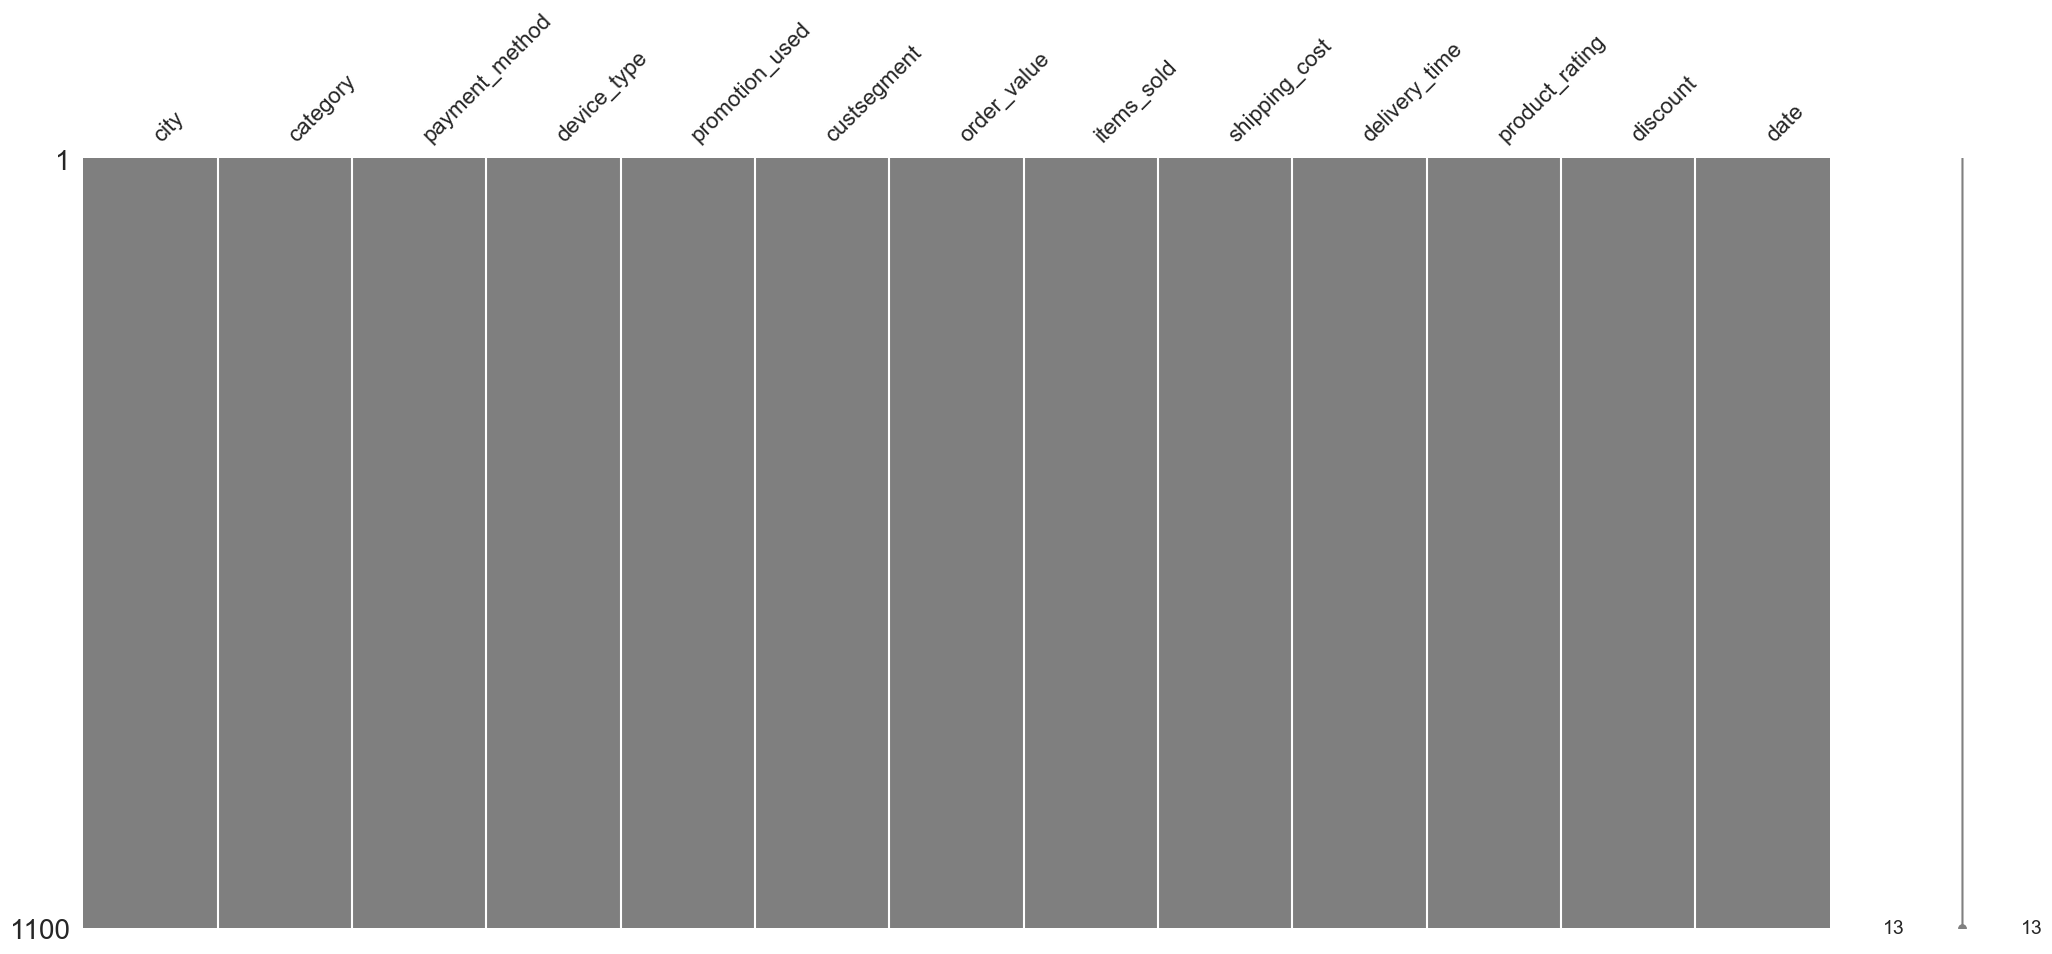

In [1188]:
msno.matrix(df, color = (0.5, 0.5, 0.5));

In [1189]:
df.head()

,city,category,payment_method,device_type,promotion_used,custsegment,order_value,items_sold,shipping_cost,delivery_time,product_rating,discount,date
0,Bursa,Clothing,Credit Card,Desktop,Yes,New,477.75,10,32.34,6,4.7,113.97,2020-04-01
1,Ankara,Toys,Debit Card,Desktop,No,Returning,369.63,4,34.56,2,4.6,103.36,2023-11-01
2,Samsun,Clothing,E-Wallet,Desktop,No,Returning,264.94,3,24.97,3,3.4,22.84,2011-05-01
3,Diyarbakır,Clothing,E-Wallet,Mobile,Yes,New,353.31,8,36.25,4,3.6,59.85,2017-02-01
4,Bursa,Clothing,Credit Card,Desktop,Yes,Returning,476.56,6,43.16,4,4.2,7.82,2013-06-01


In [1190]:
df.isna().sum()

city              0
category          0
payment_method    0
device_type       0
promotion_used    0
custsegment       0
order_value       0
items_sold        0
shipping_cost     0
delivery_time     0
product_rating    0
discount          0
date              0
dtype: int64

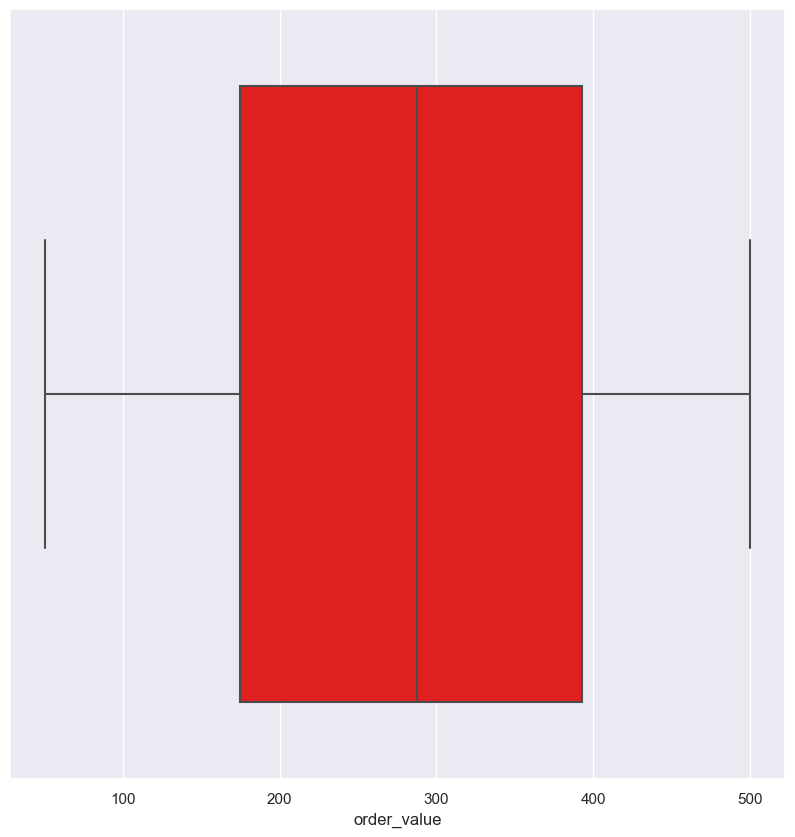

In [1191]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'order_value', data = df, color = 'red');

In [1192]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(df['order_value'], i)))

The 99.0th percentile value is 496.88
The 99.1th percentile value is 497.07
The 99.2th percentile value is 497.81
The 99.3th percentile value is 498.16
The 99.4th percentile value is 498.30
The 99.5th percentile value is 498.66
The 99.6th percentile value is 498.89
The 99.7th percentile value is 499.13
The 99.8th percentile value is 499.30
The 99.9th percentile value is 499.50


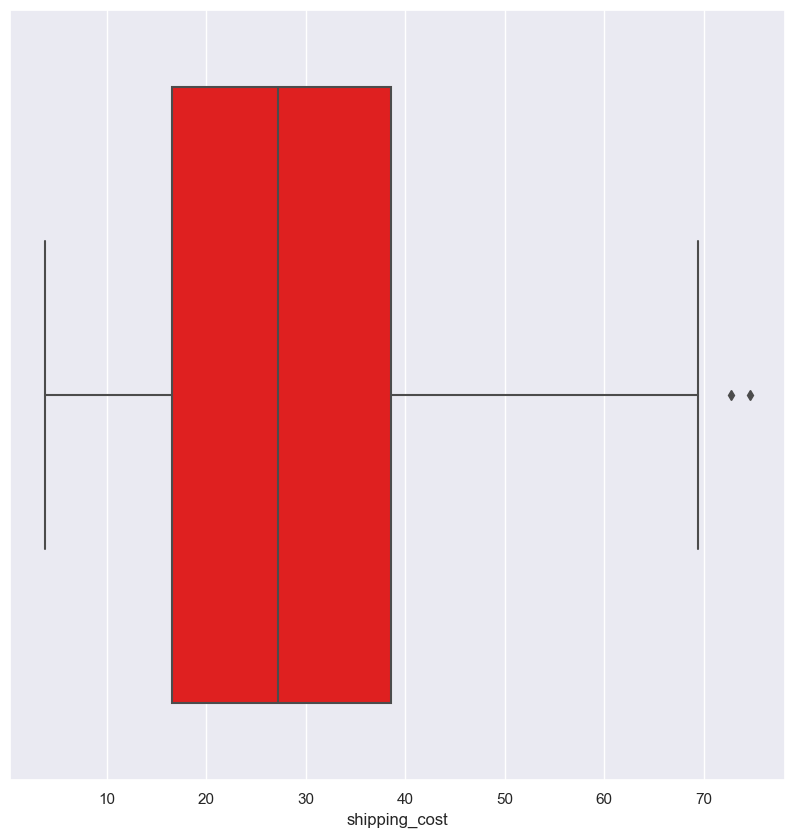

In [1193]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'shipping_cost', data = df, color = 'red');

In [1194]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(df['shipping_cost'], i)))

The 99.0th percentile value is 66.50
The 99.1th percentile value is 66.53
The 99.2th percentile value is 66.76
The 99.3th percentile value is 66.81
The 99.4th percentile value is 66.93
The 99.5th percentile value is 67.38
The 99.6th percentile value is 68.57
The 99.7th percentile value is 69.27
The 99.8th percentile value is 69.40
The 99.9th percentile value is 72.41


In [1195]:
df = df[df['shipping_cost'] < 70]

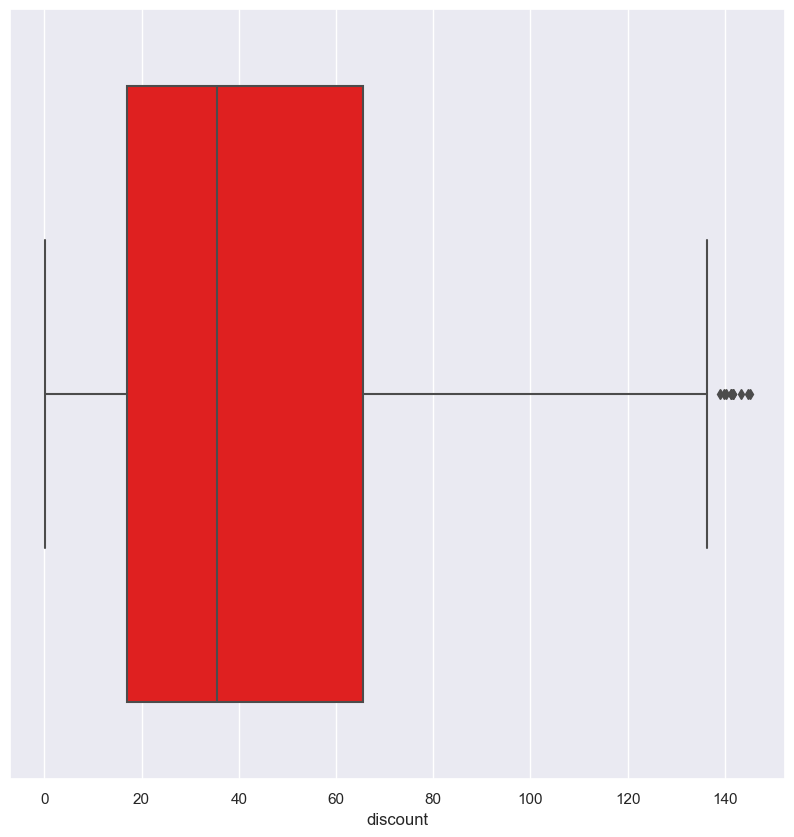

In [1196]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'discount', data = df, color = 'red');

In [1197]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(df['discount'], i)))

The 99.0th percentile value is 136.18
The 99.1th percentile value is 136.59
The 99.2th percentile value is 139.23
The 99.3th percentile value is 139.97
The 99.4th percentile value is 140.67
The 99.5th percentile value is 141.16
The 99.6th percentile value is 141.51
The 99.7th percentile value is 141.73
The 99.8th percentile value is 143.07
The 99.9th percentile value is 144.69


In [1198]:
df = df[df['discount'] < 140]

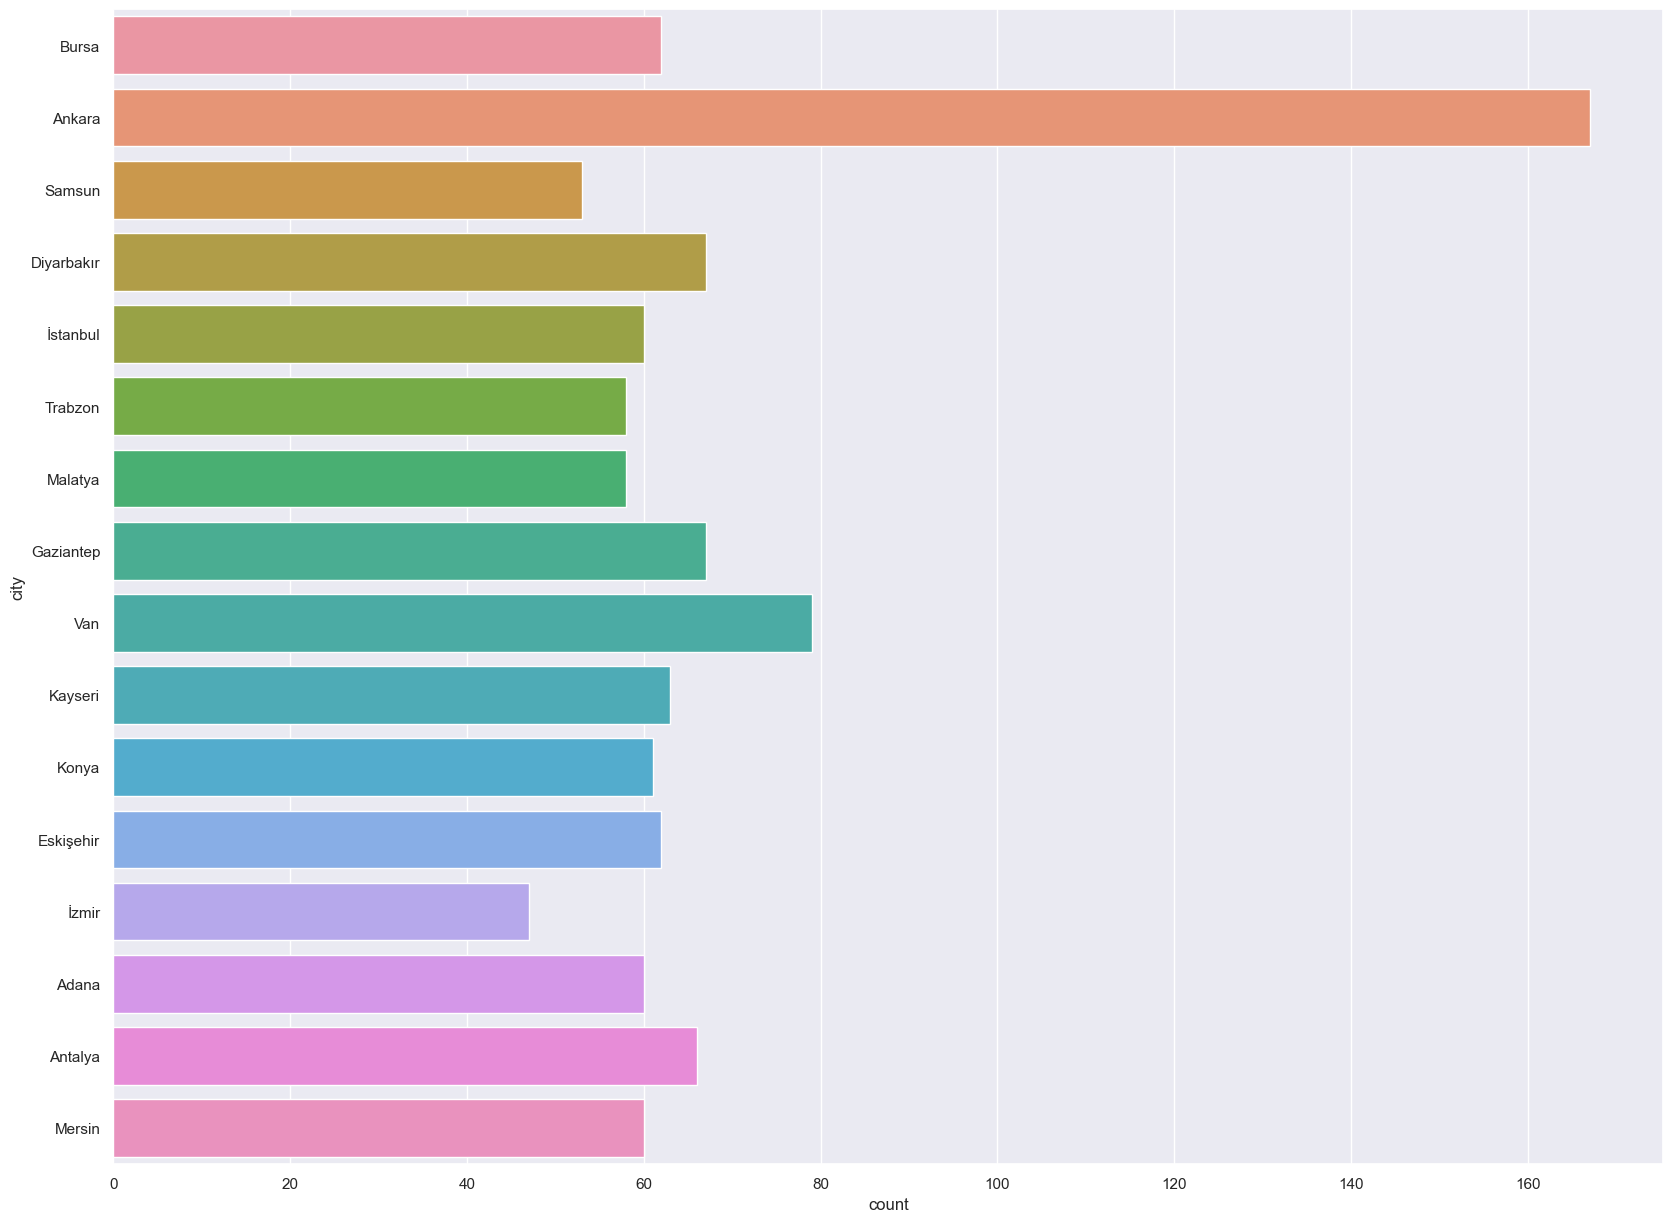

In [1199]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df.city)
plt.title("", fontsize = 20)
plt.show()

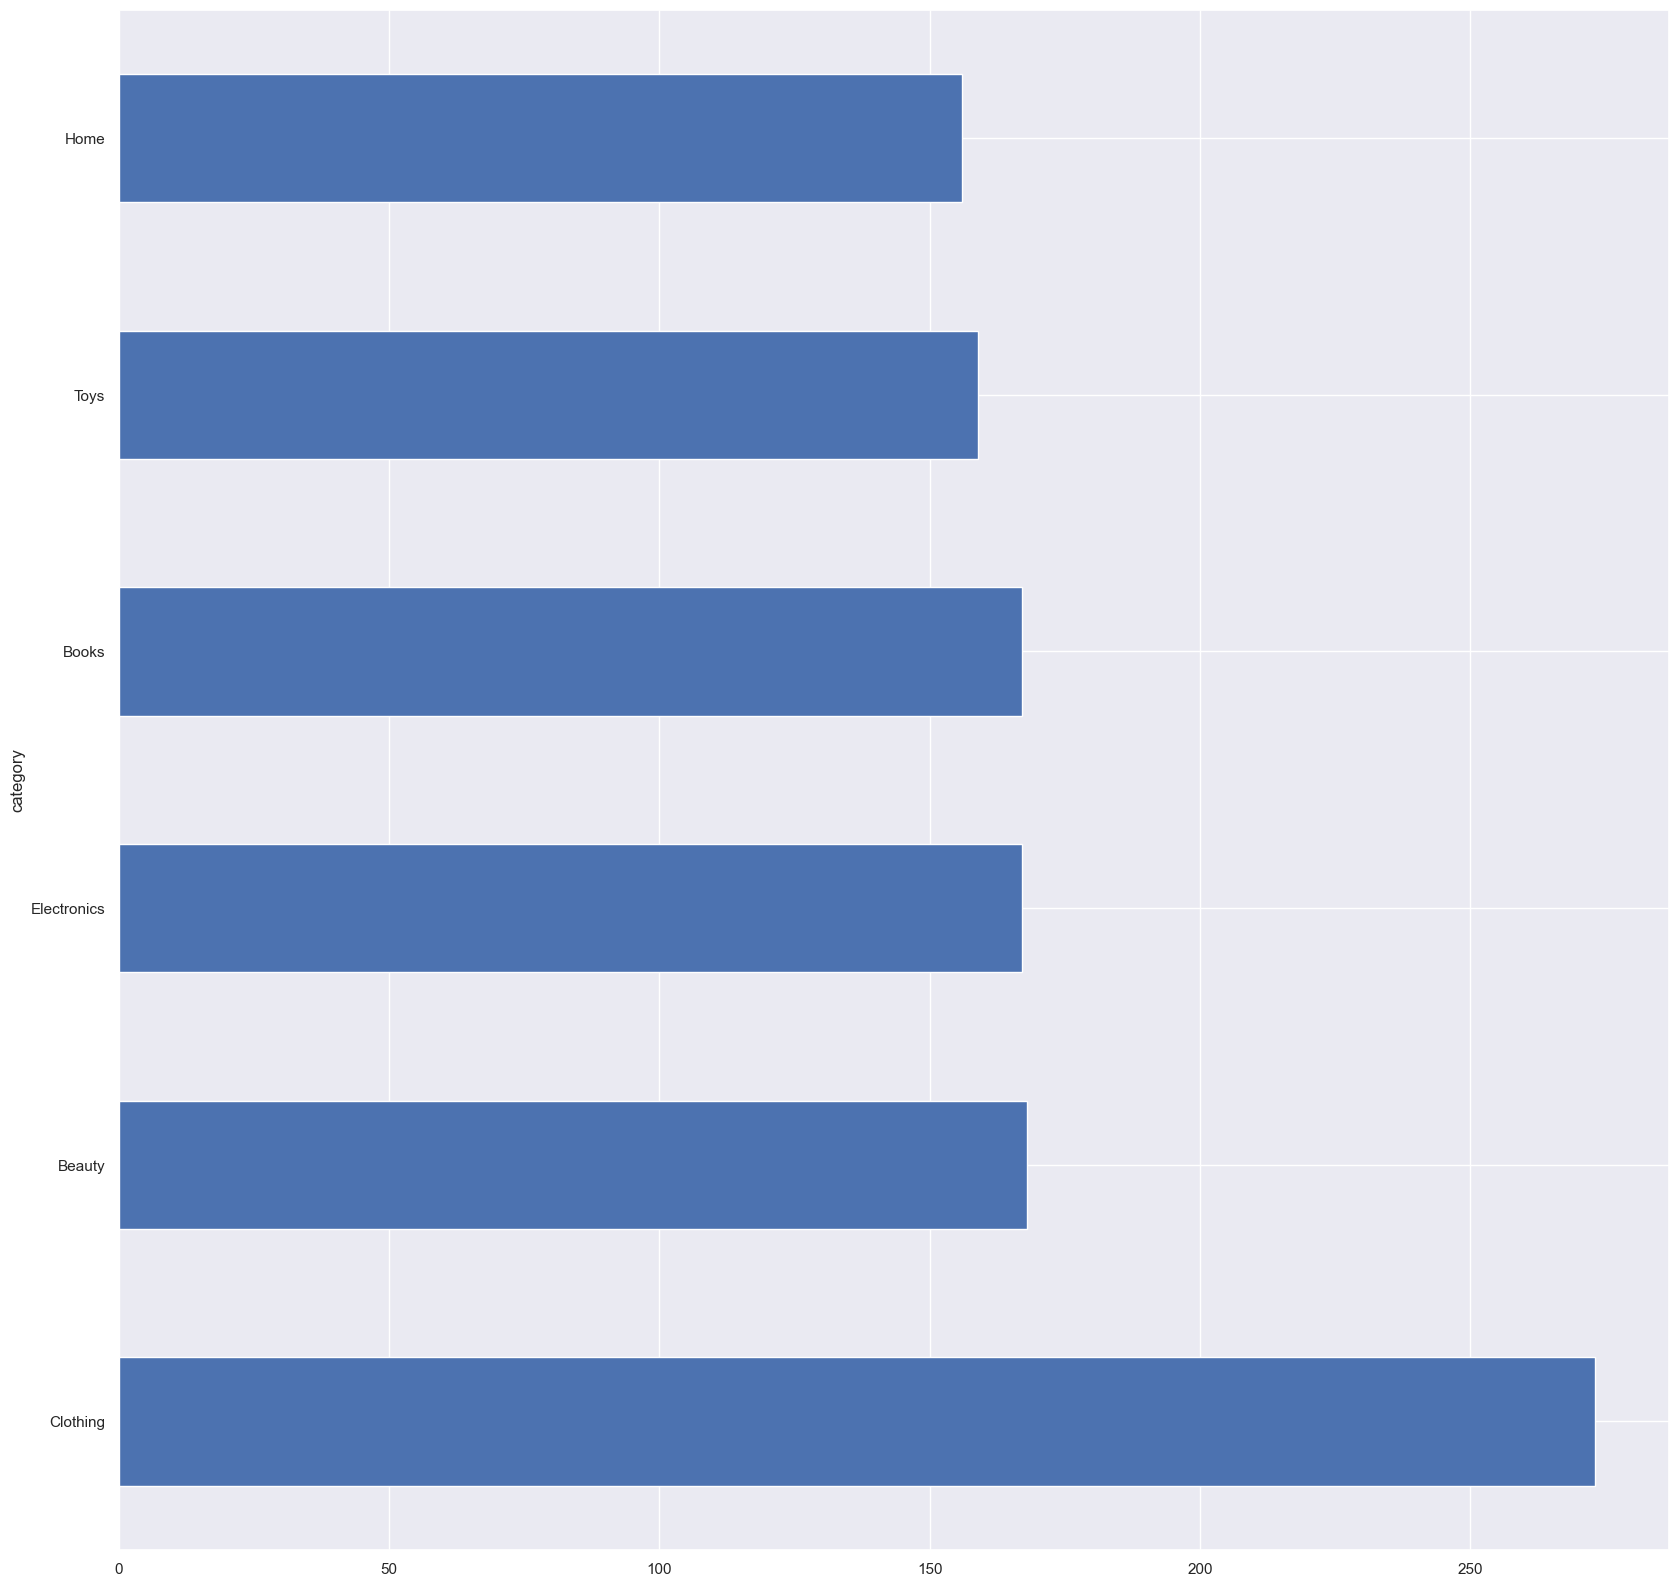

In [1200]:
df["category"].value_counts().plot.barh();

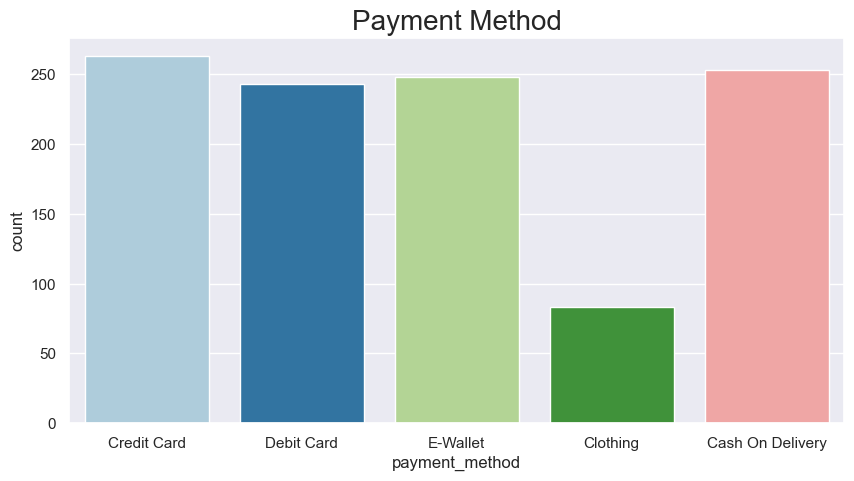

In [1201]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["payment_method"], palette = 'Paired')
plt.title("Payment Method", fontsize = 20)
plt.show()

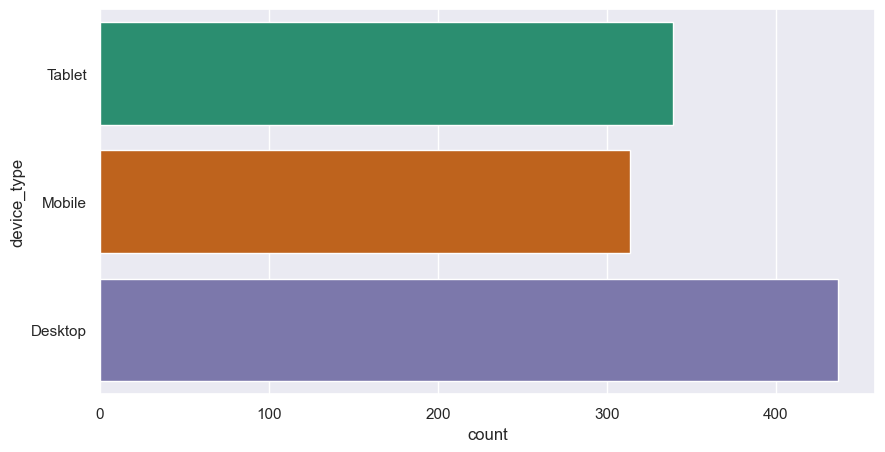

In [1202]:
plt.figure(figsize = (10, 5))
sns.countplot(y = df['device_type'].sort_values(ascending = False), palette = 'Dark2');

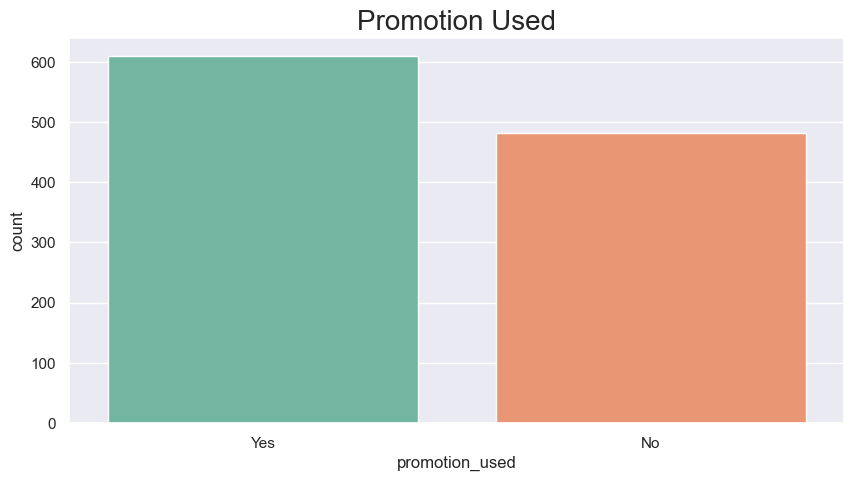

In [1203]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["promotion_used"], palette = 'Set2')
plt.title("Promotion Used", fontsize = 20)
plt.show()

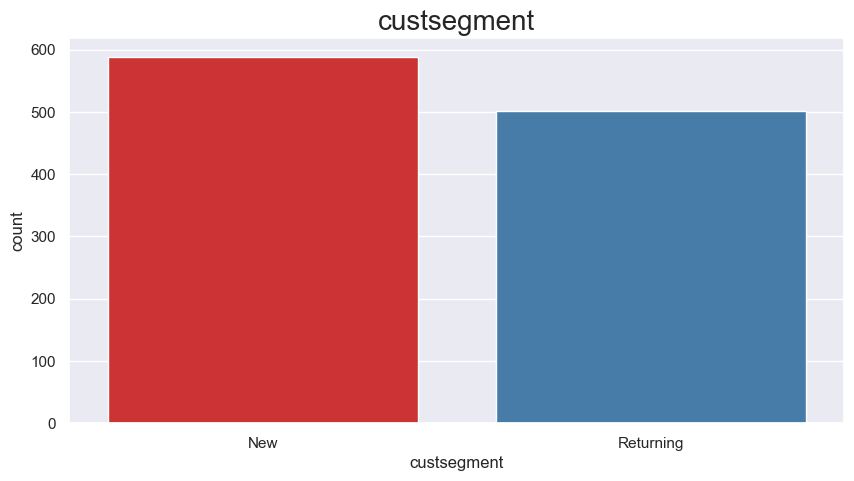

In [1204]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["custsegment"], palette = 'Set1')
plt.title("custsegment", fontsize = 20)
plt.show()

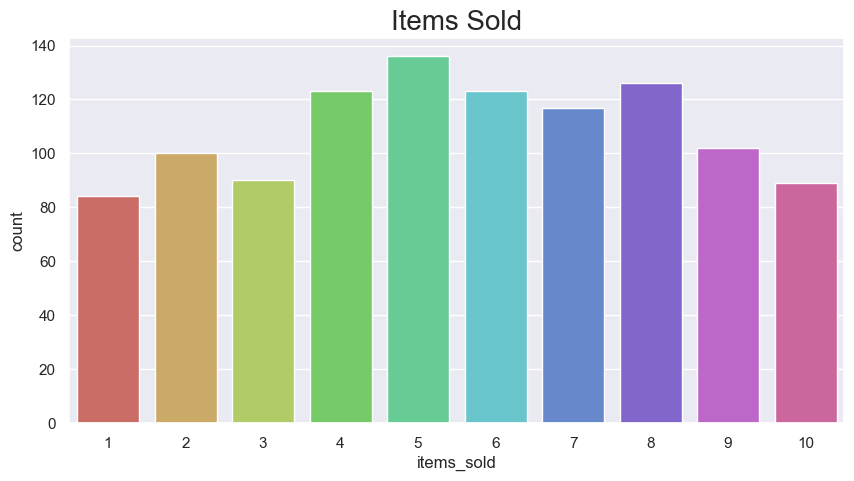

In [1205]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["items_sold"], palette = 'hls')
plt.title("Items Sold", fontsize = 20)
plt.show()

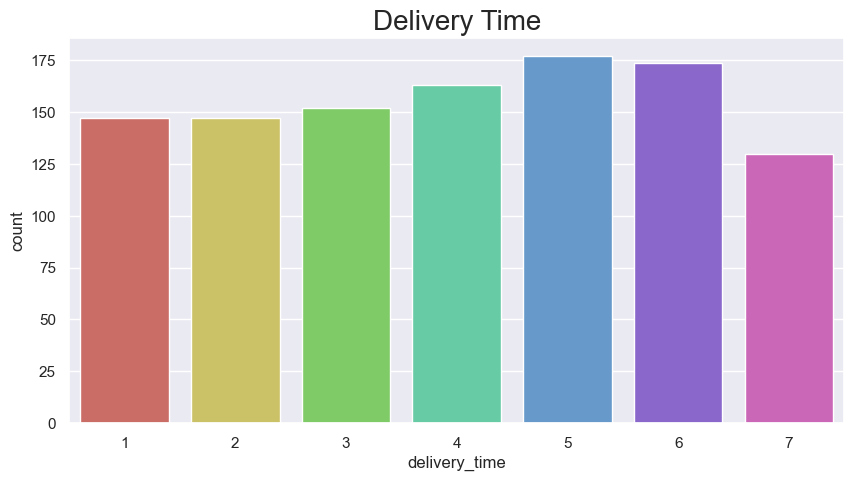

In [1206]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["delivery_time"], palette = 'hls')
plt.title("Delivery Time", fontsize = 20)
plt.show()

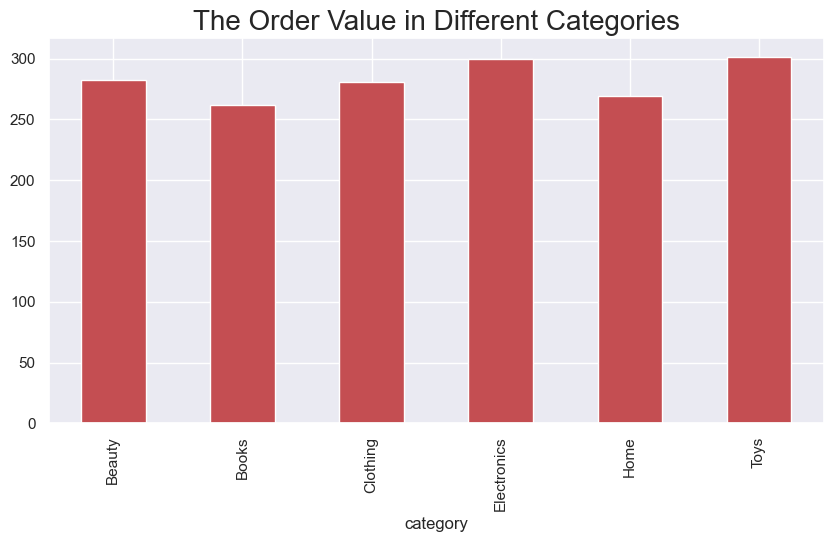

In [1207]:
plt.figure(figsize = (10, 5))
df.groupby('category')['order_value'].mean().plot(kind = 'bar', color = 'r')
plt.title("The Order Value in Different Categories", fontsize = 20)
plt.show()

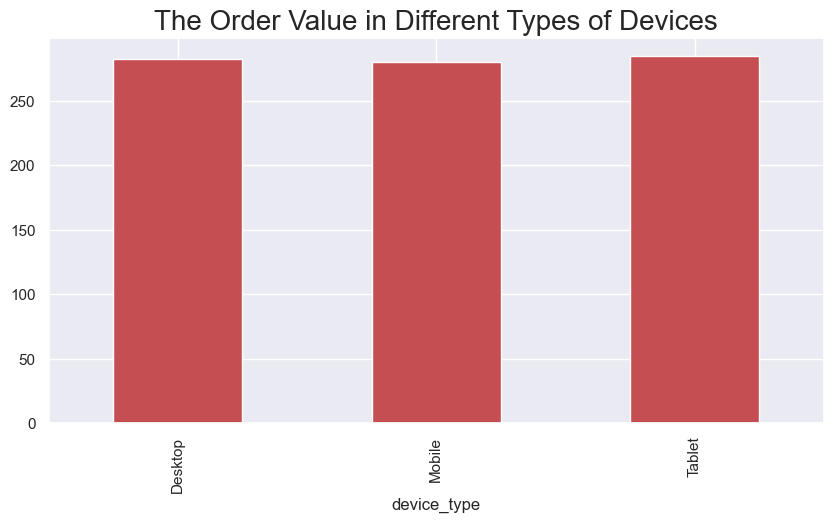

In [1208]:
plt.figure(figsize = (10, 5))
df.groupby('device_type')['order_value'].mean().plot(kind = 'bar', color = 'r')
plt.title("The Order Value in Different Types of Devices", fontsize = 20)
plt.show()

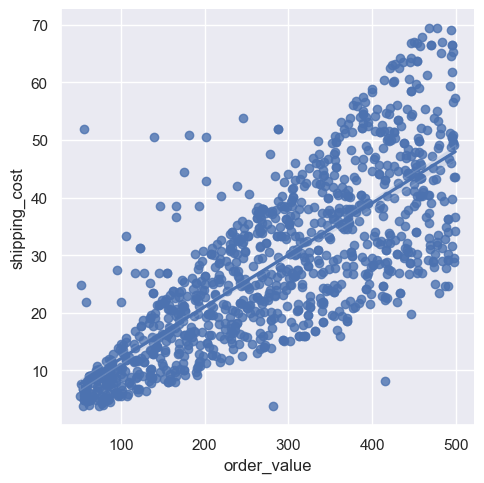

In [1209]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'order_value', y = 'shipping_cost', data = df);

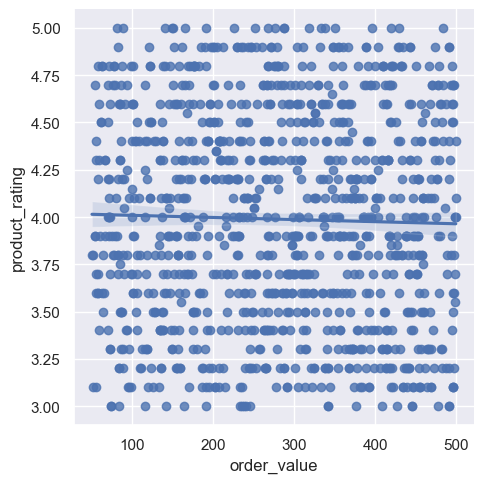

In [1210]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'order_value', y = 'product_rating', data = df);

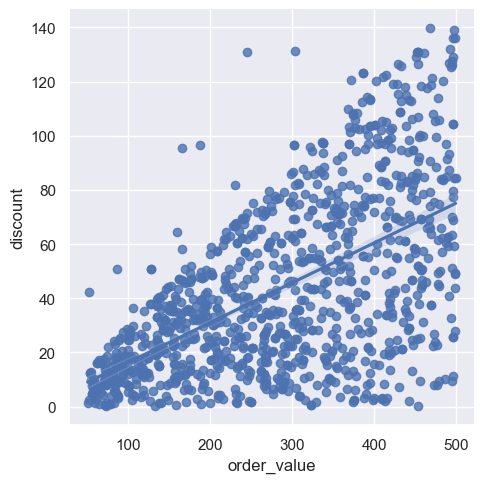

In [1211]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'order_value', y = 'discount', data = df);

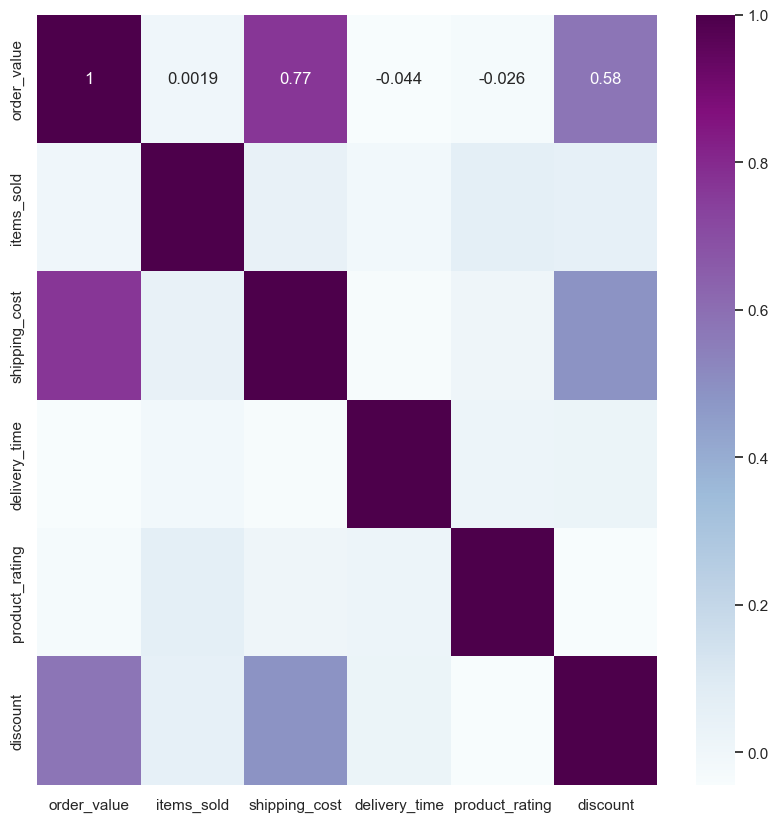

In [1212]:
plt.figure(figsize = (10, 10))
numeric_columns = ['order_value', 'items_sold', 'shipping_cost', 'delivery_time', 'product_rating', 'discount']
heatmap_df = df[numeric_columns].corr()
sns.heatmap(heatmap_df,  cmap = 'BuPu', annot = True);

In [1213]:
#df.to_csv('temiz.csv', index=False)